### TRABAJO PRÁCTICO FINAL

### Análisis gráfico del dataset:
https://datos.gob.ar/dataset/acumar-indice-calidad-vida-icv-cuenca-matanza-riachuelo

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import sklearn as sk

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Aldy\Downloads\icv.csv")

In [8]:
df.sample(10)

,tipo,partido_descripcion,radio10,sup_ha,pobl_tot,dens_ha,dim_salud,dim_educacion,dim_entorno,dim_vivienda,icv,wkt
608,URBANO,Ezeiza,62700104,31.58,1418,44.90,0.50,0.55,0.69,0.46,0.54,"MULTIPOLYGON (((5632935.3627 6142131.3331,5632..."
1608,URBANO,La Matanza,64275505,18.62,1509,81.04,0.94,0.65,0.74,0.90,0.81,"MULTIPOLYGON (((5629772.5735 6159200.0042,5629..."
559,URBANO,Esteban Echeverria,62600308,19.23,1218,63.34,0.50,0.62,0.99,0.72,0.69,"MULTIPOLYGON (((5638181.5586 6150079.0235,5638..."
3535,NaN,CABA,20042112,15.66,557,35.57,0.94,0.65,0.70,0.79,0.77,MULTIPOLYGON (((5649737.99917113 6165490.51514...
3468,NaN,CABA,20091507,13.40,1059,79.03,0.93,0.64,0.65,0.96,0.78,MULTIPOLYGON (((5638939.83772602 6164348.49972...
3146,NaN,CABA,20071609,9.29,1057,113.78,0.99,0.70,0.68,0.89,0.85,MULTIPOLYGON (((5642289.42784409 6166060.75597...
149,URBANO,Almirante Brown,60283010,19.34,1496,77.35,0.25,0.59,0.97,0.62,0.53,"MULTIPOLYGON (((5642679.53220002 6144423.9457,..."
1155,URBANO,La Matanza,64274207,8.68,930,107.14,0.69,0.62,0.74,0.86,0.67,"MULTIPOLYGON (((5631142.1778 6160354.5264,5631..."
1439,URBANO,La Matanza,64275211,5.74,1223,213.07,0.54,0.53,0.71,0.59,0.61,"MULTIPOLYGON (((5632306.4436 6156643.0096,5632..."
3092,NaN,CABA,20071203,6.86,772,112.54,1.00,0.77,0.86,0.97,0.91,MULTIPOLYGON (((5641978.44609794 6167124.82196...


### Tipos de variables

In [27]:
df.dtypes

tipo                    object
partido_descripcion     object
sup_ha                 float64
pobl_tot                 int64
dens_ha                float64
dim_salud              float64
dim_educacion          float64
dim_entorno            float64
dim_vivienda           float64
icv                    float64
dtype: object

- tipo (Clasificación de los radios censales -unidad geográfica que agrupa, en promedio 300 viviendas en las ciudades- según la forma en que se asienta y distribuye la población en el territorio): variable cualitativa o categórica.
- partido_descripción (Municipio al que pertenece el radio censal): variable cualitativa o categórica.
- sup_ha (Superficie en hectáreas (ha) del radio censal): variable cuantitativa continua.
- pobl_total (Población total del radio censal): variable cuantitativa discreta.
- dens_ha (Densidad poblacional bruta del radio censal expresada en Hab/Ha): variable cuantitativa continua.
- dim_salud (Valor que adquiere la dimensión salud pública del ICV): variable cuantitativa continua.
- dim_educación (Valor que adquiere la dimensión educación del ICV): variable cuantitativa continua.
- dim_vivienda (Valor que adquiere la dimensión vivienda del ICV): variable cuantitativa continua.
- icv (Valor que adquiere el Índice de Calidad de Vida): variable cuantitativa continua.

### Identificación de target value y features
Mientras que ICV es nuestra target value o variable objetivo, las demás variables constituyen nuestros features.

In [13]:
df.shape

(3538, 12)

### Hipótesis
- Hipótesis 1: Los habitantes de CABA gozan de un ICV mayor al de los demás municipios.
- Hipótesis 2: Cuánto mayor el valor que adquiere la dimensión salud por radio censal, mayor es el ICV. 
- Hipótesis 3: Cuánto mayor el valor que adquiere la dimensión educación por radio censal, mayor es el ICV. 
- Hipótesis 4: Cuánto mayor el valor que adquiere la dimensión vivienda por radio censal, mayor es el ICV. 
- Hipótesis 5: Ni la superficie en hectáreas, ni la población total ni la densidad poblacional bruta del radio censal inciden significativamente en el ICV.

A continuación, se descartarán aquellos features que no resultan útiles para nuestro análisis.

In [23]:
df.drop(columns=["radio10"], inplace=True)

In [25]:
df.drop(columns=["wkt"], inplace=True)

### Valores nulos

In [28]:
df.isna().sum()

tipo                   916
partido_descripcion      0
sup_ha                   0
pobl_tot                 0
dens_ha                  0
dim_salud                0
dim_educacion            0
dim_entorno              0
dim_vivienda             0
icv                      0
dtype: int64

La feature "tipo" presenta 916 valores nulos. 

### Gráficos

Al tratarse de variables categóricas, se utilizarán diagramas de barras para analizar la distribución de casos de las variables "tipo" y "partido_descripcion".

La presencia de outliers da cuenta de la ausencia de valores en una celda.

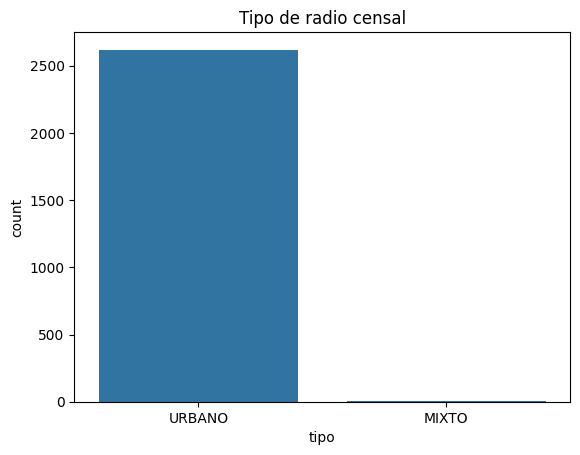

In [35]:
sns.countplot(data=df, x="partido_descripcion")
plt.title("Tipo de radio censal") 
plt.show()

C:\Users\Aldy\AppData\Local\Temp\ipykernel_4036\126834455.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


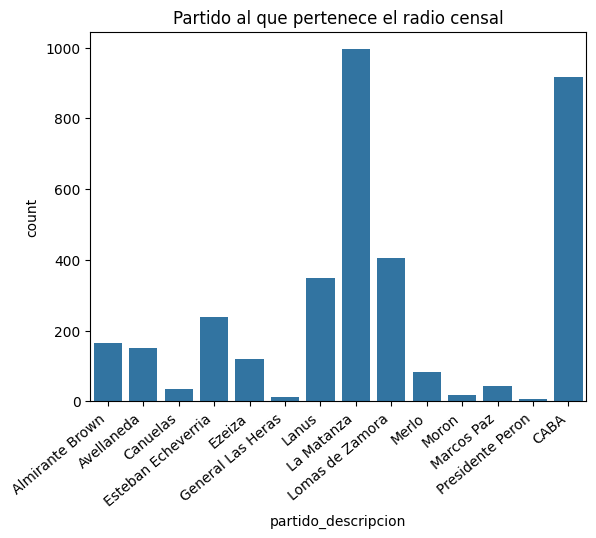

In [44]:
ax = sns.countplot(data=df, x="partido_descripcion")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Partido al que pertenece el radio censal")
plt.show()

En cuanto a las variables cuantitativas continuas y discretas, se utilizarán gráficos de caja para analizar la distribución de sus datos e identificar outliers (valores anormales respecto al resto de datos por variable).

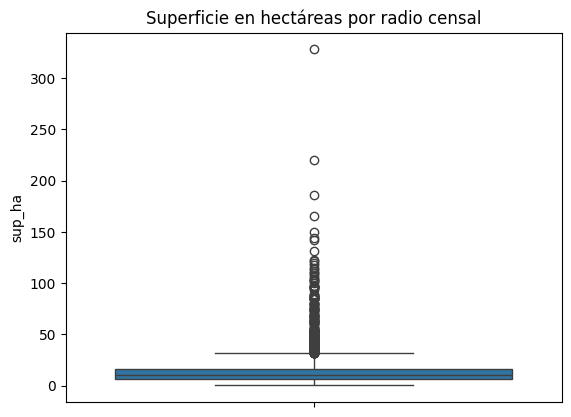

In [49]:
sns.boxplot (data=df, y="sup_ha")
plt.title("Superficie en hectáreas por radio censal") 
plt.show()

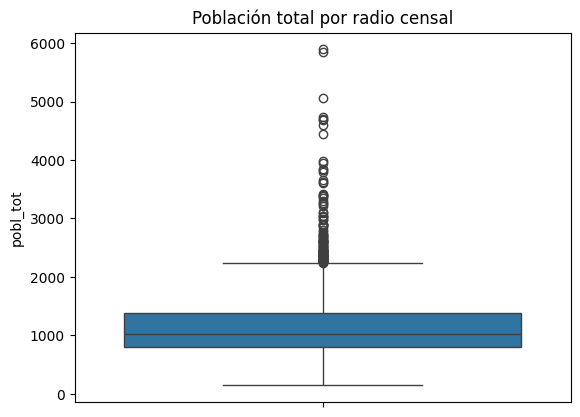

In [51]:
sns.boxplot (data=df, y="pobl_tot")
plt.title("Población total por radio censal") 
plt.show()

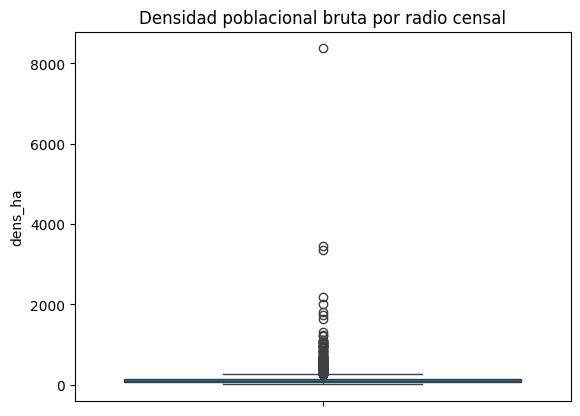

In [52]:
sns.boxplot (data=df, y="dens_ha")
plt.title("Densidad poblacional bruta por radio censal") 
plt.show()

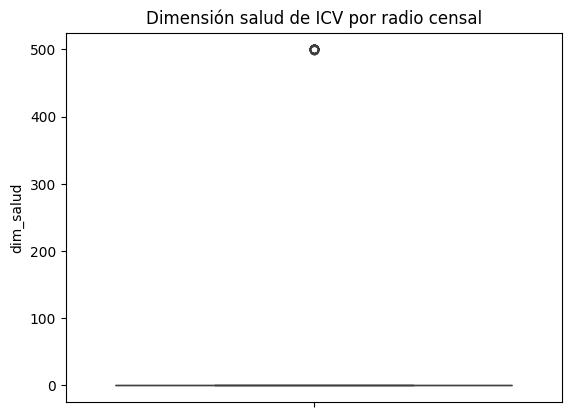

In [55]:
sns.boxplot (data=df, y="dim_salud")
plt.title("Dimensión salud de ICV por radio censal") 
plt.show()

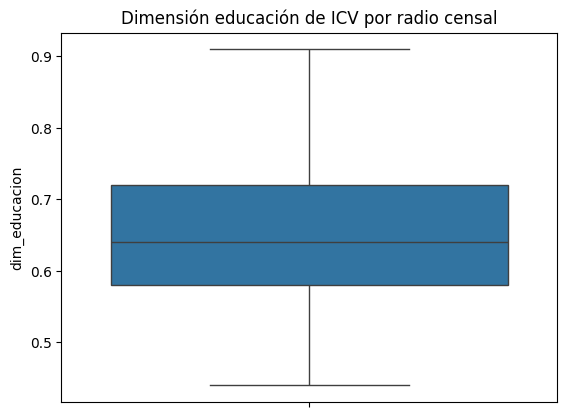

In [54]:
sns.boxplot (data=df, y="dim_educacion")
plt.title("Dimensión educación de ICV por radio censal") 
plt.show()

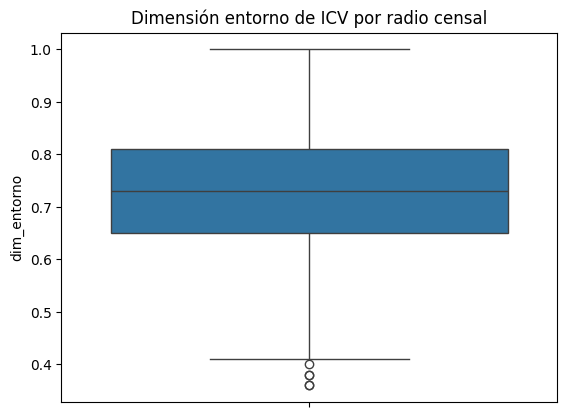

In [56]:
sns.boxplot (data=df, y="dim_entorno")
plt.title("Dimensión entorno de ICV por radio censal") 
plt.show()

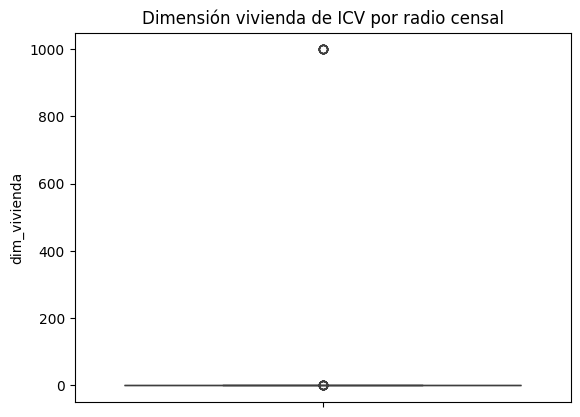

In [58]:
sns.boxplot (data=df, y="dim_vivienda")
plt.title("Dimensión vivienda de ICV por radio censal") 
plt.show()

### Identificación y reemplazo de outliers

In [8]:
Q1 = df["sup_ha"].quantile(0.25)
Q3 = df["sup_ha"].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
outliers = df[(df["sup_ha"] > umbral_superior) | (df["sup_ha"] < umbral_inferior)]
print("Cantidad de outliers en sup_ha", len(outliers))

Cantidad de outliers en sup_ha 298


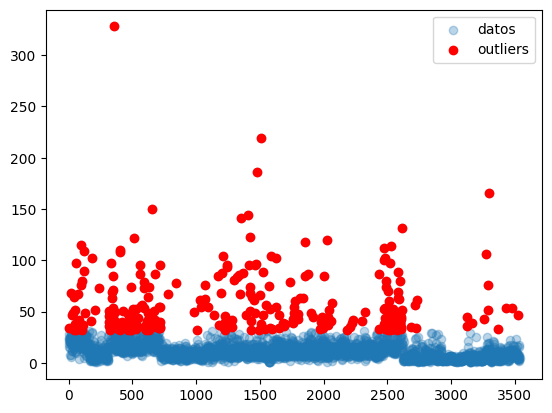

In [9]:
plt.scatter(df.index,df["sup_ha"], label="datos", alpha= 0.3)
plt.scatter(outliers.index, outliers["sup_ha"], color="red", label="outliers")
plt.legend()

In [10]:
Q1 = df["pobl_tot"].quantile(0.25)
Q3 = df["pobl_tot"].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
outliers = df[(df["pobl_tot"] > umbral_superior) | (df["pobl_tot"] < umbral_inferior)]
print("Cantidad de outliers en pobl_tot", len(outliers))

Cantidad de outliers en pobl_tot 108


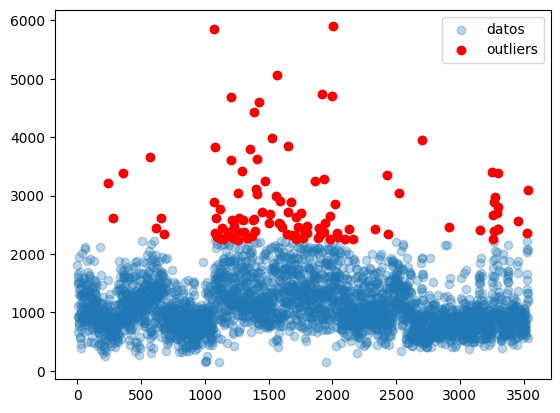

In [11]:
plt.scatter(df.index,df["pobl_tot"], label="datos", alpha= 0.3)
plt.scatter(outliers.index, outliers["pobl_tot"], color="red", label="outliers")
plt.legend()

In [12]:
Q1 = df["dens_ha"].quantile(0.25)
Q3 = df["dens_ha"].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
outliers = df[(df["dens_ha"] > umbral_superior) | (df["dens_ha"] < umbral_inferior)]
print("Cantidad de outliers en dens_ha", len(outliers))

Cantidad de outliers en dens_ha 358


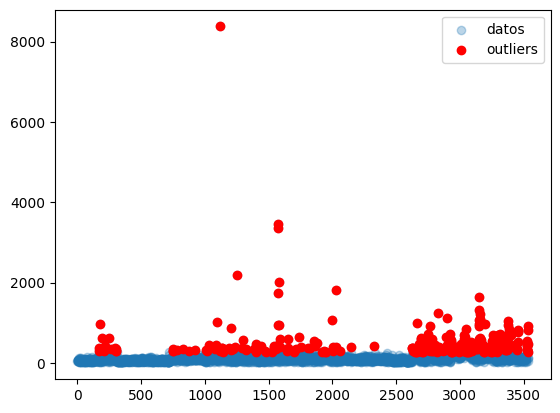

In [13]:
plt.scatter(df.index,df["dens_ha"], label="datos", alpha= 0.3)
plt.scatter(outliers.index, outliers["dens_ha"], color="red", label="outliers")
plt.legend()

In [14]:
Q1 = df["dim_salud"].quantile(0.25)
Q3 = df["dim_salud"].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
outliers = df[(df["dim_salud"] > umbral_superior) | (df["dim_salud"] < umbral_inferior)]
print("Cantidad de outliers en dim_salud", len(outliers))

Cantidad de outliers en dim_salud 17


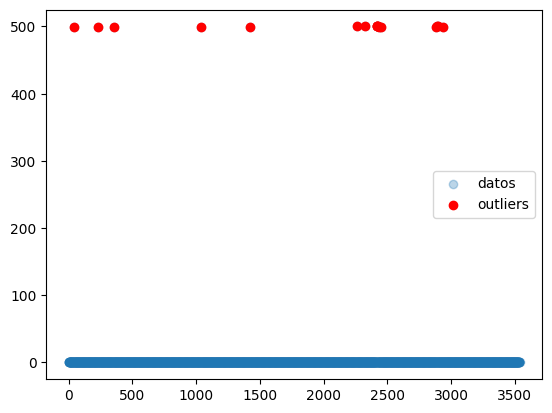

In [15]:
plt.scatter(df.index,df["dim_salud"], label="datos", alpha= 0.3)
plt.scatter(outliers.index, outliers["dim_salud"], color="red", label="outliers")
plt.legend()

In [17]:
Q1 = df["dim_entorno"].quantile(0.25)
Q3 = df["dim_entorno"].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
outliers = df[(df["dim_entorno"] > umbral_superior) | (df["dim_entorno"] < umbral_inferior)]
print("Cantidad de outliers en dim_entorno", len(outliers))

Cantidad de outliers en dim_entorno 5


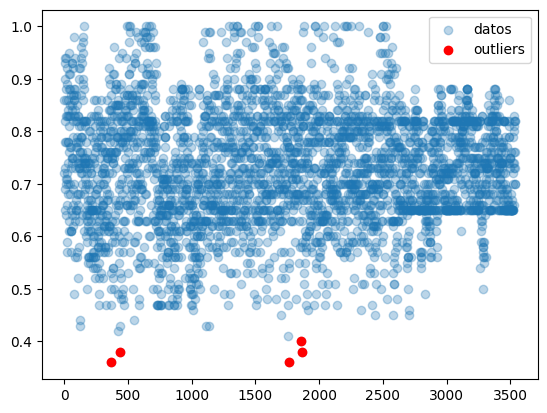

In [18]:
plt.scatter(df.index,df["dim_entorno"], label="datos", alpha= 0.3)
plt.scatter(outliers.index, outliers["dim_entorno"], color="red", label="outliers")
plt.legend()

In [19]:
Q1 = df["dim_vivienda"].quantile(0.25)
Q3 = df["dim_vivienda"].quantile(0.75)
iqr = Q3 - Q1
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr
outliers = df[(df["dim_vivienda"] > umbral_superior) | (df["dim_vivienda"] < umbral_inferior)]
print("Cantidad de outliers en dim_vivienda", len(outliers))

Cantidad de outliers en dim_vivienda 20


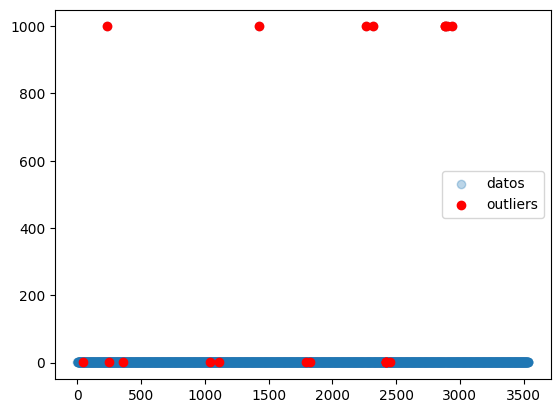

In [20]:
plt.scatter(df.index,df["dim_vivienda"], label="datos", alpha= 0.3)
plt.scatter(outliers.index, outliers["dim_vivienda"], color="red", label="outliers")
plt.legend()

Al detectar un número elevado de outliers, se utilizará la mediana (medida robusta, no sensible a outliers) para su reemplazo.

In [62]:
pobl_totMedian = df["pobl_tot"].median()
df["pobl_tot"].fillna(pobl_totMedian, inplace=True)

In [63]:
sup_haMedian = df["sup_ha"].median()
df["sup_ha"].fillna(sup_haMedian, inplace=True)

In [64]:
dens_haMedian = df["dens_ha"].median()
df["dens_ha"].fillna(dens_haMedian, inplace=True)

In [67]:
dim_saludMedian = df["dim_salud"].median()
df["dim_salud"].fillna("dim_salud", inplace=True)

In [68]:
dim_educacionMedian = df["dim_educacion"].median()
df["dim_educacion"].fillna("dim_educacion", inplace=True)

In [69]:
dim_entornoMedian = df["dim_entorno"].median()
df["dim_entorno"].fillna("dim_entorno", inplace=True)

In [70]:
dim_viviendaMedian = df["dim_vivienda"].median()
df["dim_vivienda"].fillna("dim_vivienda", inplace=True)

Para continuar con el análisis, se le asignarán valores numéricos a las variables categóricas.

In [72]:
df = pd.get_dummies(df, columns=["partido_descripcion"], drop_first=True)

In [71]:
df = pd.get_dummies(df, columns=["tipo"], drop_first=True)

### Medidas de tendencia central, de posición y de dispersión

In [18]:
df.describe(include="all")

,tipo,partido_descripcion,radio10,sup_ha,pobl_tot,dens_ha,dim_salud,dim_educacion,dim_entorno,dim_vivienda,icv,wkt
count,2622,3538,3.538000e+03,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538
unique,2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3538
top,URBANO,La Matanza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((5645940.22390002 6137259.4127,..."
freq,2619,995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,5.240494e+07,14.848160,1144.651215,141.505495,3.069825,0.655291,0.726572,3.076586,0.760480,NaN
std,NaN,NaN,1.916160e+07,16.993707,516.910380,214.026117,34.529391,0.087595,0.109306,47.418413,1.028176,NaN
min,NaN,NaN,2.001241e+07,0.330000,144.000000,10.000000,0.030000,0.440000,0.360000,0.220000,0.270000,NaN
25%,NaN,NaN,2.009143e+07,6.540000,805.250000,68.577500,0.500000,0.580000,0.650000,0.720000,0.610000,NaN
50%,NaN,NaN,6.427171e+07,10.630000,1025.500000,101.725000,0.590000,0.640000,0.730000,0.860000,0.690000,NaN
75%,NaN,NaN,6.434021e+07,16.517500,1381.000000,149.315000,0.960000,0.720000,0.810000,0.950000,0.820000,NaN


In [225]:
df["sup_ha"].median()

10.63

In [9]:
df["sup_ha"].mode()

0     8.64
1     8.93
2     9.38
3    10.01
4    10.57
Name: sup_ha, dtype: float64

In [226]:
df["pobl_tot"].median()

1025.5

In [10]:
df["pobl_tot"].mode()

0    825
Name: pobl_tot, dtype: int64

In [227]:
df["dens_ha"].median()

101.725

In [11]:
df["dens_ha"].mode()

0    100.0
Name: dens_ha, dtype: float64

In [228]:
df["dim_salud"].median()

0.59

In [12]:
df["dim_salud"].mode()

0    1.0
Name: dim_salud, dtype: float64

In [229]:
df["dim_entorno"].median()

0.73

In [13]:
df["dim_entorno"].mode()

0    0.65
Name: dim_entorno, dtype: float64

In [230]:
df["dim_educacion"].median()

0.64

In [14]:
df["dim_educacion"].mode()

0    0.58
Name: dim_educacion, dtype: float64

In [231]:
df["dim_vivienda"].median()

0.86

In [15]:
df["dim_vivienda"].mode()

0    0.96
Name: dim_vivienda, dtype: float64

In [232]:
df["icv"].median()

0.69

In [16]:
df["icv"].mode()

0    0.63
Name: icv, dtype: float64

Es importante aclarar que, para determinar si una feature posee un alto grado de dispersión o no, se dividió el desvío estándar por la media, multiplicando el resultado por 100. En este sentido, si el resultado de dicho cálculo arrojó valores superior al 20%, se determinó que dicha feature posee un alto grado de dispersión.

Feature "sup_ha"

- La media o promedio de superficie es de 14.84816 hectáreas.
- La mediana es de 10.63 hectáreas, lo cual implica que el 50% de radios censales poseen 10.63 hectáreas o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de  8.64 hectáreas, lo cual implica que es la superficie en hectáreas que más se repite en los radios censales.
- El desvío estándar es de 16.99 hectáreas. Esta feature posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que el 25% de radio censales posee 6.54 hectáreas o menos y que el 75% de radios censales poseen 16.517 hectáreas o menos.


Feature "pobl_tot"

- La media o promedio poblacional es de 1144.65 habitantes por radio censal.
- La mediana es de 1025.5 habitantes, lo cual implica que el 50% de radios censales poseen 1025.5 habitantes o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de  825 habitantes, lo cual implica que es la cantidad de habitantes que más se repite en los radios censales.
- El desvío estándar es de 516.91 habitantes. Esta feature posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que el 25% de radio censales posee 805.25 habitantes o menos y que el 75% de radios censales poseen 1381 habitantes o menos.


Feature "dens_ha"

- La media o promedio de densidad poblacional bruta es de 141.505 hab/ha por radio censal.
- La mediana es de 101.725 hab/ha, lo cual implica que el 50% de radios censales poseen 101.725 hab/ha o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de 100 hab/ha, lo cual implica que es la cantidad de habitantes por hectáreas que más se repite en los radios censales.
- El desvío estándar es de 214.026 hab/ha. Esta feature posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que el 25% de radio censales posee 68.577 hab/ha o menos y que el 75% de radios censales poseen 149.31 hab/ha o menos.


Feature "dim_salud"

- La media o promedio de valores que adquiere la dimensión salud es de 3.069 por radio censal.
- La mediana es de 0.59, lo cual implica que, en el 50% de radios censales, la dimensión salud adquiere valores iguales a 0.59 o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de 1, lo cual implica que es el valor adquirido por la dimensión salud que más se repite en los radios censales.
- El desvío estándar es de 34.529. Esta feature posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que, en el 25% de radio censales, la dimensión salud adquiere valores iguales a 0.50 o menos y que, en el 75% de radios censales, adquiere valores iguales a 0.96 o menos.


Feature "dim_entorno"

- La media o promedio de valores que adquiere la dimensión entorno es de 0.726 por radio censal.
- La mediana es de 0.73, lo cual implica que, en el 50% de radios censales, la dimensión entorno adquiere valores iguales a 0.73 o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de 0.65, lo cual implica que es el valor adquirido por la dimensión entorno que más se repite en los radios censales.
- El desvío estándar es de 0.109. Esta feature no posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que, en el 25% de radio censales, la dimensión entorno adquiere valores iguales a 0.65 o menos y que, en el 75% de radios censales, adquiere valores iguales a 0.81 o menos.


Feature "dim_educacion"

- La media o promedio de valores que adquiere la dimensión educación es de 0.655 por radio censal.
- La mediana es de 0.655, lo cual implica que, en el 50% de radios censales, la dimensión educación adquiere valores iguales a 0.655 o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de 0.58, lo cual implica que es el valor adquirido por la dimensión educación que más se repite en los radios censales.
- El desvío estándar es de 0.087. Esta feature no posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que, en el 25% de radio censales, la dimensión educación adquiere valores iguales a 0.58 o menos y que, en el 75% de radios censales, adquiere valores iguales a 0.72 o menos.


Feature "dim_vivienda"

- La media o promedio de valores que adquiere la dimensión vivienda es de 3.076 por radio censal.
- La mediana es de 0.86, lo cual implica que, en el 50% de radios censales, la dimensión vivienda adquiere valores iguales a 0.86 o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de 0.96, lo cual implica que es el valor adquirido por la dimensión vivienda que más se repite en los radios censales.
- El desvío estándar es de 47.418. Esta feature no posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que, en el 25% de radio censales, la dimensión vivienda adquiere valores iguales a 0.72 o menos y que, en el 75% de radios censales, adquiere valores iguales a 0.95 o menos.


Variabe objetivo "icv"

- La media o promedio de valores que adquiere el icv es de 0.76 por radio censal.
- La mediana es de 0.69, lo cual implica que, en el 50% de radios censales, el icv adquiere valores iguales a 0.69 o menos, a su vez, ésto puede ser deducido a partir del análisis de percentiles.
- La moda es de 0.63, lo cual implica que es el valor adquirido por el icv que más se repite en los radios censales.
- El desvío estándar es de 1.028. Esta feature no posee un alto grado de dispersión.
- A partir del análisis de Q1 y Q3, podemos afirmar que, en el 25% de radio censales, el icv adquiere valores iguales a 0.61 o menos y que, en el 75% de radios censales, adquiere valores iguales a 0.82 o menos.


En cuanto a las variables categoriales, a partir del análisis de su moda, podemos afirmar que:
- En la feature "partido_descripcion", el partido que más se repite es La Matanza.
- En la feature "tipo", el tipo de radio censal que más se repite es el urbano.


### Matriz de correlación

In [153]:

corr = corr.apply(pd.to_numeric, errors='coerce')

corr = corr.fillna(0)


In [156]:
non_numeric_count = df.apply(pd.to_numeric, errors='coerce').isnull().sum().sum()

print("Cantidad de valores no numéricos:", non_numeric_count)

Cantidad de valores no numéricos: 0


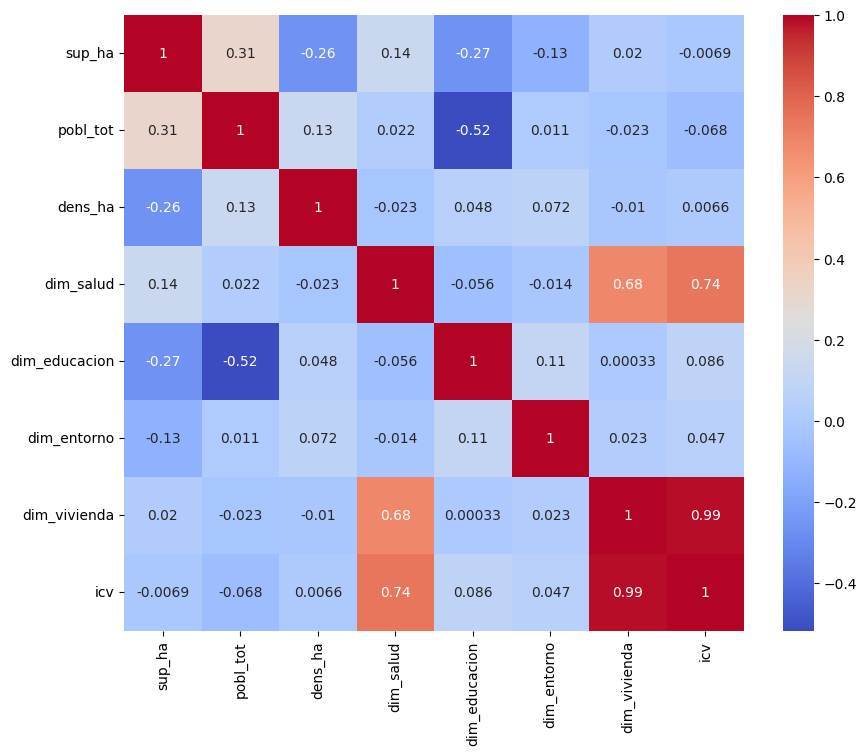

In [162]:
numeric_columns = df.select_dtypes(include=np.number)
high_corr = numeric_columns.corr()[abs(numeric_columns.corr()) > 0.0001]
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.show()

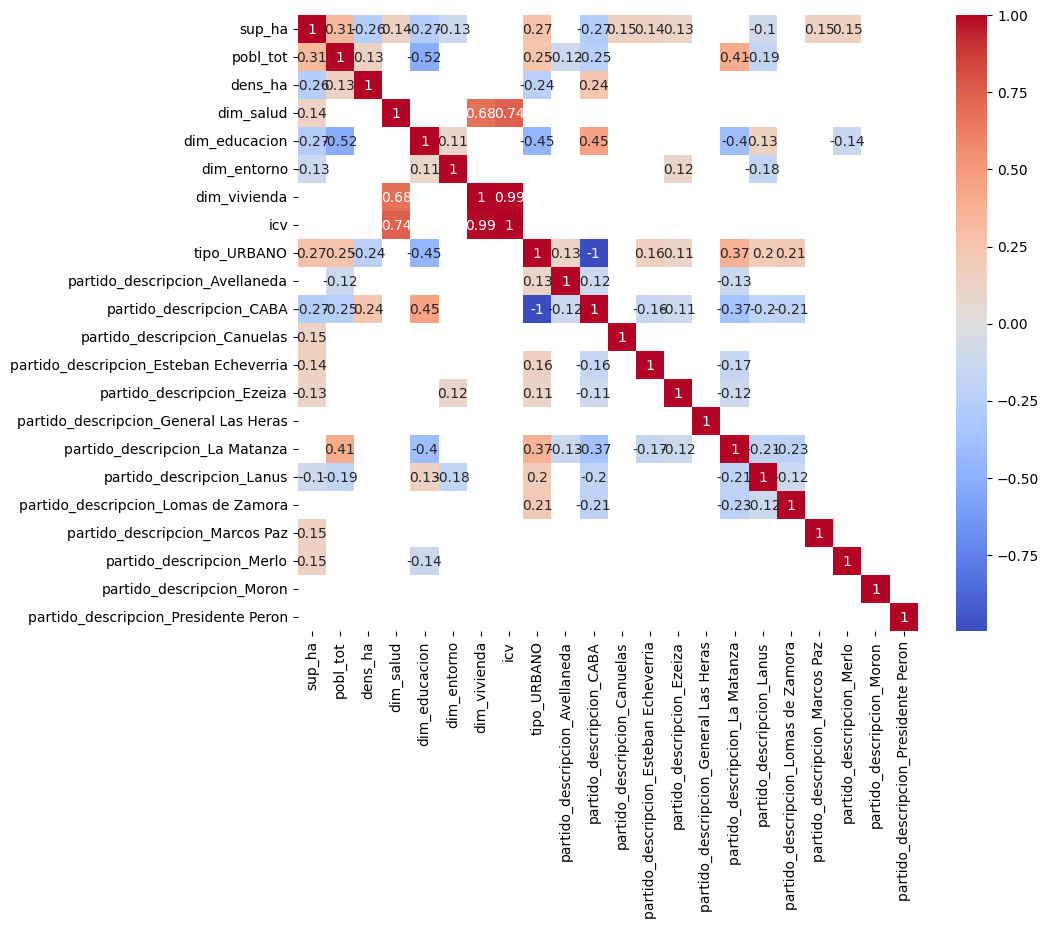

In [178]:
corr_matrix = df.corr()
threshold = 0.10
high_corr = corr_matrix[abs(corr_matrix) > threshold]
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.show()

Como se observa, las únicas features que presentan una correlación significativa (en este caso, cercanas a 1) respecto a la variable objetivo "icv" son "dim_salud" y "dim_vivienda". En base a esto, podemos afirmar que las hipótesis 2 (Cuánto mayor el valor que adquiere la dimensión salud por radio censal, mayor es el ICV) y 4 (Cuánto mayor el valor que adquiere la dimensión vivienda por radio censal, mayor es el ICV) quedan corroboradas mientras que, el resto, refutadas. Como son las únicas que presentan una correlación significativa respecto a nuestra variable objetivo, serán utilizadas para realizar una regresión lineal múltiple.

# Regresión lineal múltiple

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
model = LinearRegression()

In [89]:
X = df[["dim_salud", "dim_vivienda"]]
Y = df[["icv"]]

In [90]:
model.fit(X, Y)

LinearRegression()

In [91]:
print('Coeficientes:', model.coef_)
print('Término independiente:', model.intercept_)

Coeficientes: [[0.00384125 0.01950751]]
Término independiente: [0.68867201]


In [92]:
Y_pred = model.predict(X)

In [93]:
print('Valores reales:', Y)
print('Predicciones:', Y_pred)

Valores reales:        icv
0     0.56
1     0.79
2     0.63
3     0.63
4     0.76
...    ...
3533  0.71
3534  0.76
3535  0.77
3536  0.68
3537  0.69

[3538 rows x 1 columns]
Predicciones: [[0.70352106]
 [0.70982523]
 [0.70366266]
 ...
 [0.70769371]
 [0.70211638]
 [0.70328381]]


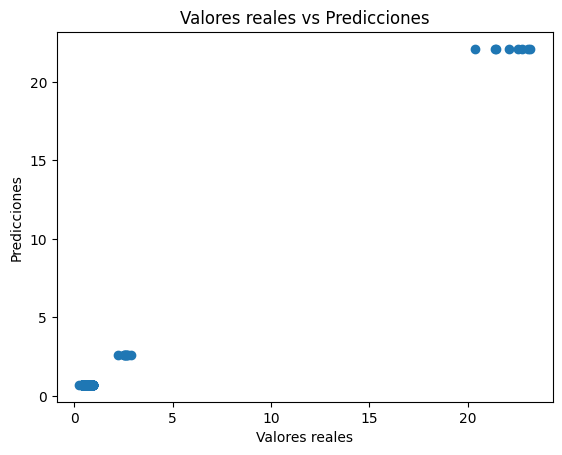

In [94]:
plt.scatter(Y, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.show()

In [95]:
print("MSE", mean_squared_error(Y_pred, Y))

MSE 0.015887190838971096


- Si el modelo tiene un R² alto y un MSE/MAE bajo, puedes concluir que las variables independientes usadas explican bien la variable dependiente.
- Si un coeficiente es significativamente alto (positivo o negativo), indica que esa variable independiente tiene una fuerte influencia en la variable dependiente.
- Si el R² es bajo y el MSE/MAE es alto, es posible que el modelo no se ajuste bien a los datos o que falten variables importantes.

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2 = r2_score(Y, Y_pred)
print("Coeficiente de determinación (R²):", r2)

Coeficiente de determinación (R²): 0.9849673703228657


# Conclusiones:
Debido a la presencia de un R-cuadrado alto (igual a 0.98) y de un MSE bajo (0.0.15), se puede afirmar que aproximadamente el 98% de la variabilidad observada en la variable dependiente (icv) está explicada por las variables independientes (dim_salud y dim_vivienda) incluidas en nuestro modelo. En otras palabras, cuando aumentan los valores de dim_salud y dim_vivienda, aumentan los valores de icv, por lo que son buenos indicadores para analizar dicha variable. Esto sugiere que nuestro modelo posee una capacidad predictiva sólida.